In [52]:
library(repr)

options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 200)#hidden code for display size

# Linear Mixed Models : application to data in cognitive science

### Module 1 : A reminder on linear models

 &nbsp;
 &nbsp;
 &nbsp;

 <center> Gabriel Weindel, PhD, April 2021 at AMU </center>

>    __Caution__ 
>    1. High statistical content taught by a non-statician
>    2. Ask for guidance/consulting
>    3. R code is kept simple -> sometimes unefficient (+ instructor = pythonista)



# Organization of the course

- Module 1 : Linear models and necessary "reminders"
- Module 2 : Hierarchies in the data and mixed models
- Module 3 : Bayesian estimation and Generalized Linear Mixed Models

## Why are we interested in linear models

When we can perform, t-tests, ANOVA, MANOVA, ANCOVA, $\chi^2$ ?

Because each of these statistical tests boil down to linear models

<img src="https://lindeloev.github.io/tests-as-linear/linear_tests_cheat_sheet.png" width="80%">

Linear Mixed Models are extensions of the linear models allowing to account for hierarchies in the data (e.g. participants, electrodes, labs, etc.). 


First we are going to refresh your memories on linear models and build on that knowledge to talk about linear mixed models !



# Organization of the first module 

1. Generalities on linear models
2. Implementing a simple linear model in R + plotting the model and its assumptions
3. Moving to LM with multiple predictiors
4. Collinearity between predictors
5. Contrast of the predictors

# Generalities on linear models

A normal distribution is defined by a mean/location ($\mu$) and a standard deviation/scale ($\sigma$)

&nbsp;
&nbsp;

<center> $x \sim \mathcal{N}(\mu, \sigma)$
    
<img src="https://raw.githubusercontent.com/GWeindel/lecture_mixed_models_AMU_2021/main/plots/normal.png" width="40%">

(Classical) Linear models are built on top of such distributions, e.g. for the normal distribution

<img style="float: left;" src="https://raw.githubusercontent.com/GWeindel/lecture_mixed_models_AMU_2021/main/plots/LM.png" width="50%">  

&nbsp; 
&nbsp; 

The classical formula : 

$y = \alpha + \beta IV + e$ <br> 

Where  : <br> 

$e \sim \mathcal{N}(0,\sigma)$ <br>


(Classical) Linear models are built on top of such distributions, e.g. for the normal distribution

<img style="float: left;" src="https://raw.githubusercontent.com/GWeindel/lecture_mixed_models_AMU_2021/main/plots/LM.png" width="50%">  

&nbsp; 
&nbsp; 

__Can be rewritten as__ :

$y \sim \mathcal{N}(\mu,\sigma)$ <br>

Where : 

$\mu = \alpha + \beta IV$

$y \sim \mathcal{N}(\mu,\sigma) ~~~~~~\text{where}~~~  \mu = \alpha + \beta IV$

Provides an overview of some of the assumptions :

- Only $\mu$ is function of the IV -> homoscedasticity
- data points are independently and identically distributed _i.i.d._
- The __residuals__ are normally distributed

<center> <img src ="https://www.khstats.com/img/tmle/parametric_assumptions_comic.jpg" width="40%"> <center> https://www.khstats.com/blog/tmle/tutorial/


Two parameters for $\mu$ :
- $\alpha$ the intercept
- $\beta$ the slope

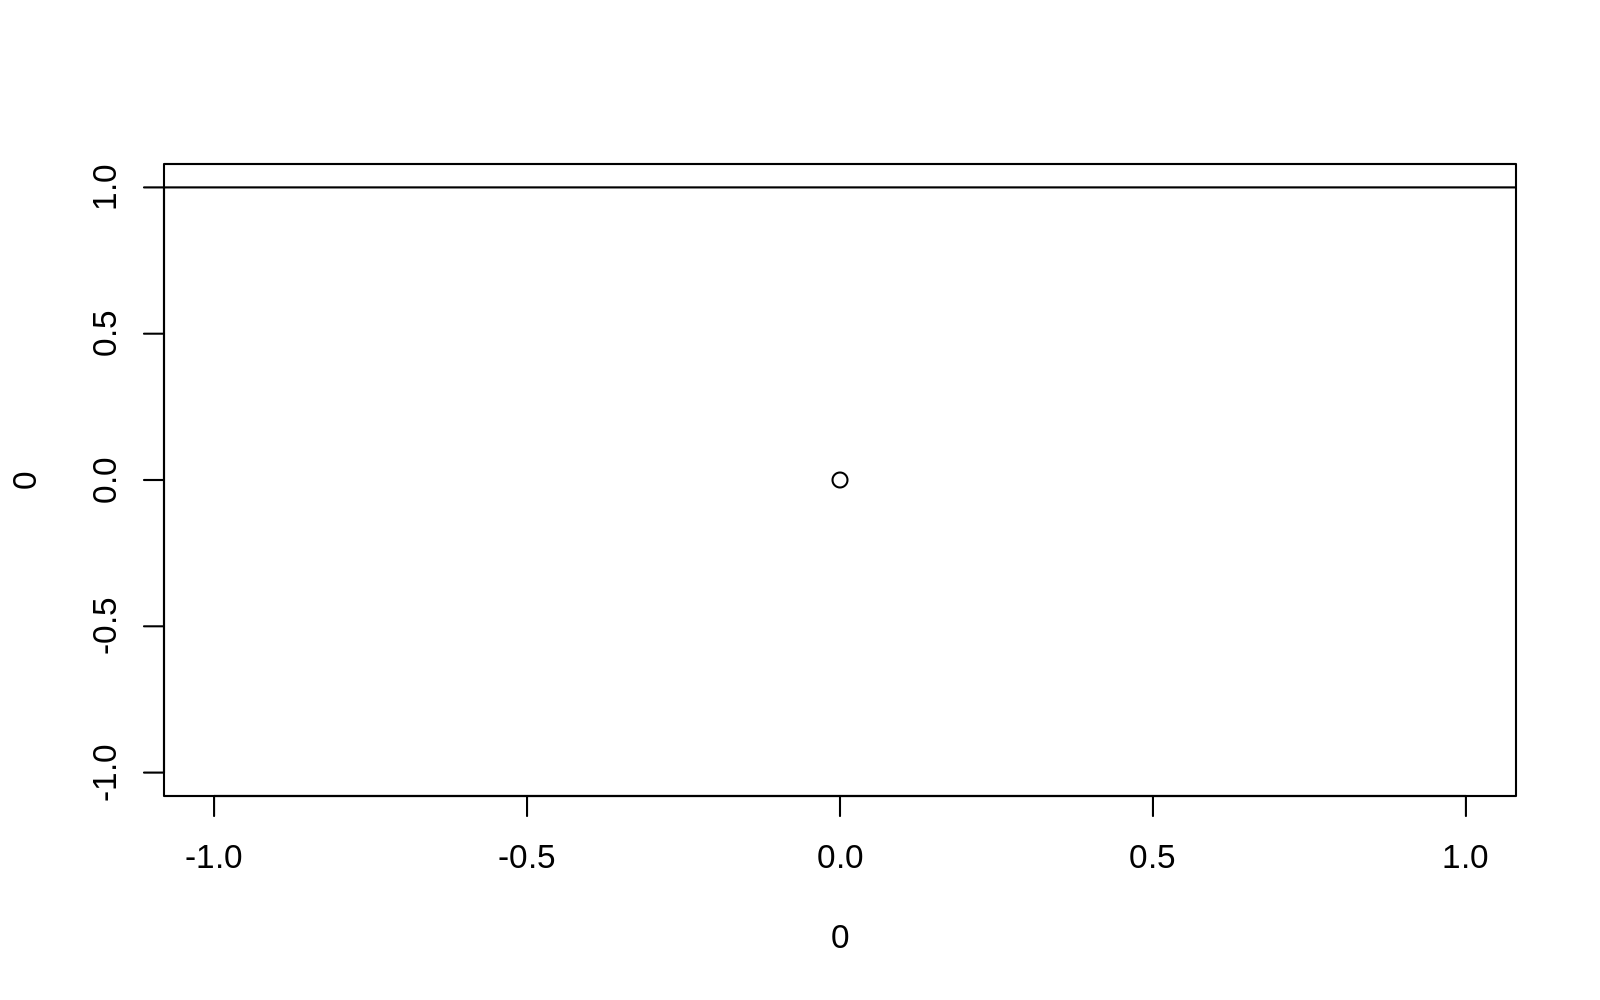

In [53]:
plot(0,0)
abline(a=1,b=0)

Let's draw some data points and see how regression line evolves:

https://observablehq.com/@tmcw/bring-your-own-doodles-linear-regression

### Parameter estimation

- __Ordinary least square__ (you know that one) : 

$$\sum_{i=1}^n(y_i - \alpha - \beta IV_i)^2$$

- Maximum Likelihood Estimation (see excellent chapter/paper by Myung [2016](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.74.671&rep=rep1&type=pdf)) :

<center>Discussed when we get to LMM

&nbsp; 
 
Note that we should go through linear algebra to have the complete picture of the math behind OLS and LM

# Implementation in R 

To implement linear models we use the base R function of _lm()_.

Let's use an example : 

In [54]:
set.seed(234)#I don't like randomness in my lectures

In [55]:
obs = 1000 #We sampled the WM of 100 persons
mean_wm = 6 #magical number 6
sd_wm = 1 #+/- 1
wm_v = rnorm(obs, mean_wm,sd_wm)#Random number generator
youngest = 1
oldest = 99
age_v = runif(obs, youngest,oldest)#Random number generator
data = data.frame(wm_v, age_v)

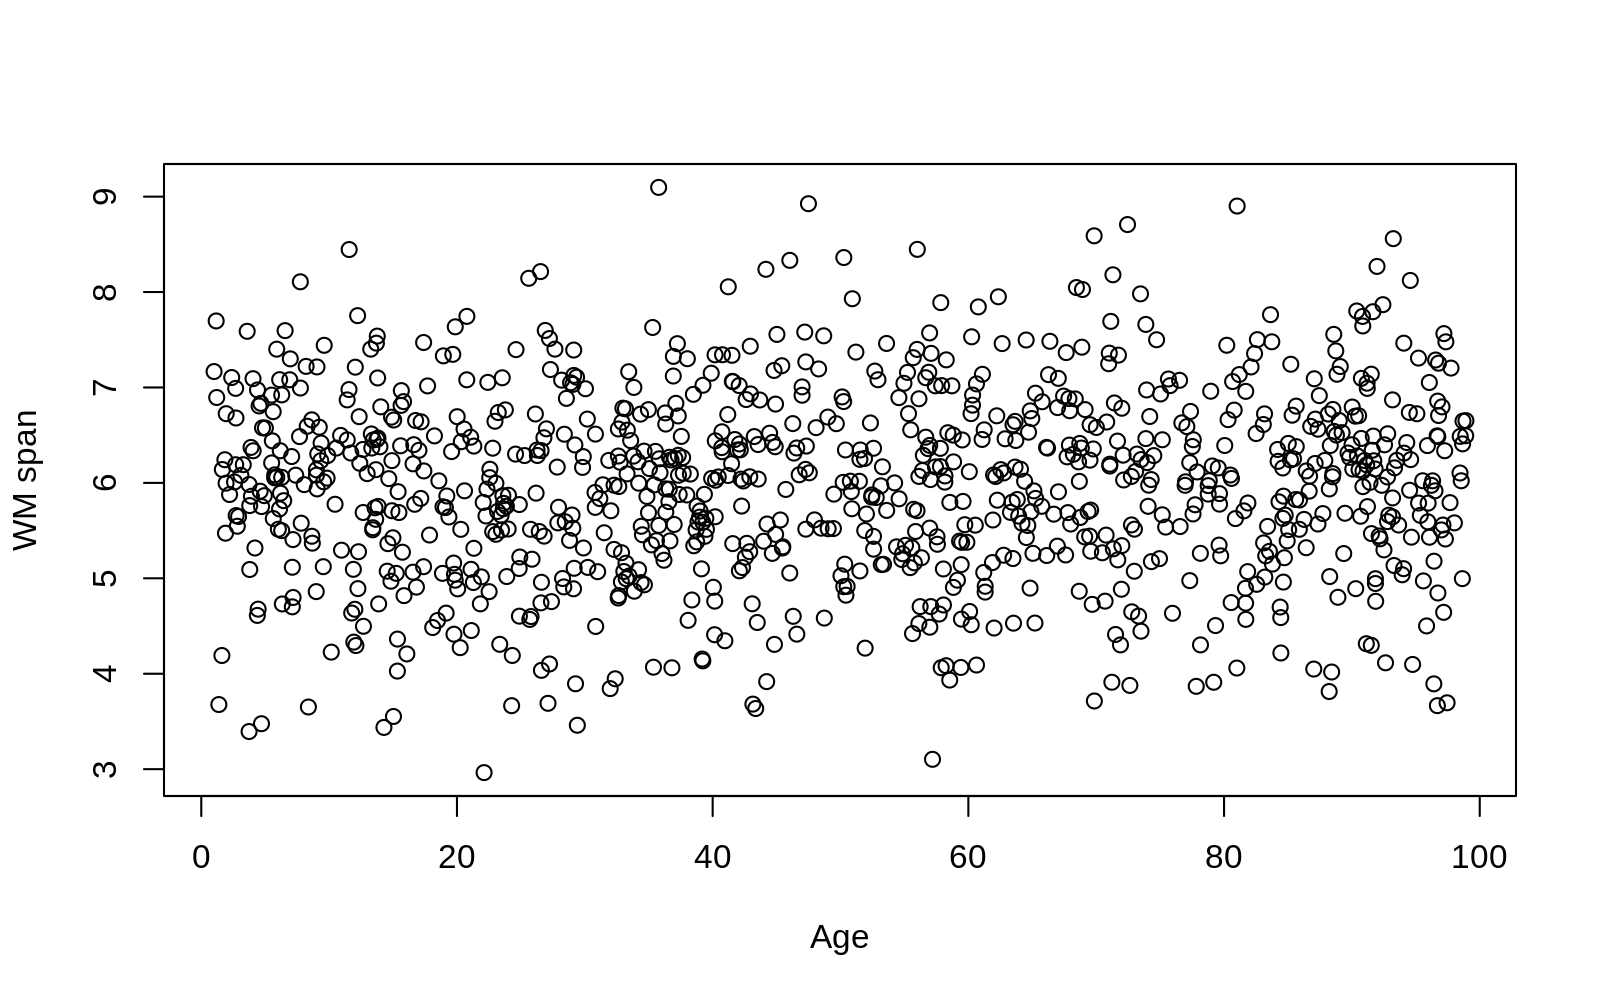

In [56]:
plot(data$age_v, data$wm_v, xlab= "Age",ylab="WM span")

But we want data with a linear relationship between DV (WM span) and the IV (age) :

In [57]:
b_age = -0.04 #aging of one unit (e.g. year) decreases the WM of 0.4 unit
data$wm_v = data$wm_v + b_age * data$age_v 

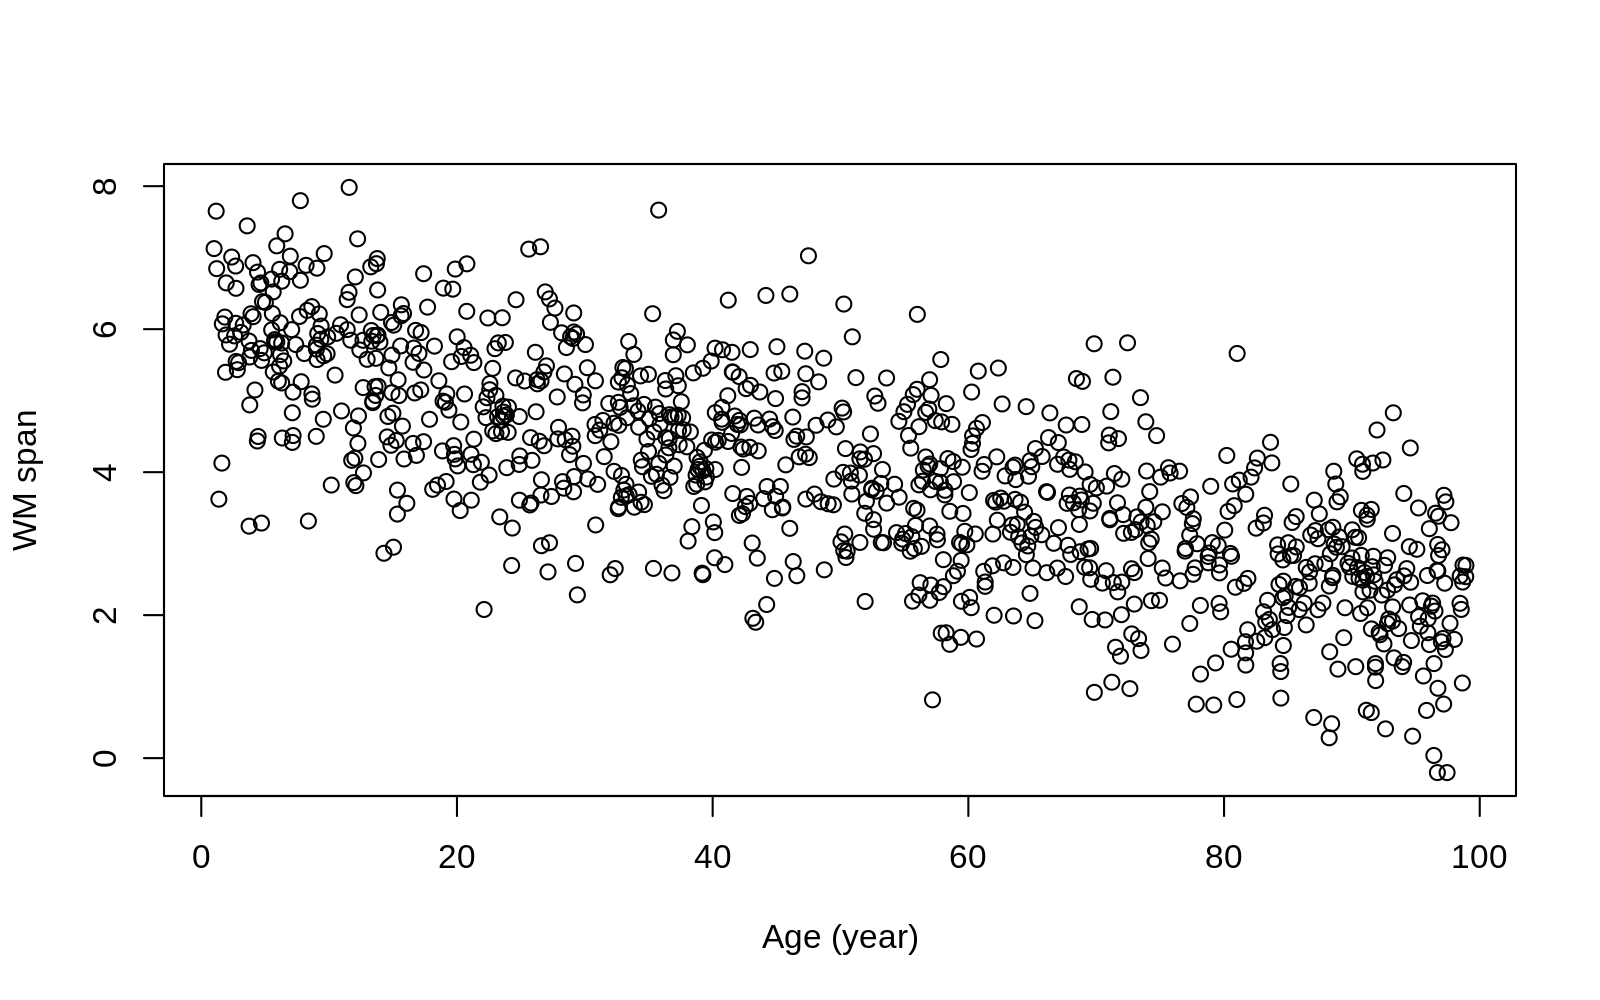

In [58]:
plot(age_v, wm_v + (age_v*b_age), xlab="Age (year)", ylab="WM span")
#above is an operation on vector ; 
# for each indiv i : wm_i = wm_v[i] + (age_v[i] * b_age)

### Let's fit a lm

In [59]:
model <- lm(wm_v ~ age_v, data=data)

In [60]:
summary(model)


Call:
lm(formula = wm_v ~ age_v, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.96585 -0.64057  0.04763  0.64576  3.14293 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.891183   0.062811   93.79   <2e-16 ***
age_v       -0.038256   0.001091  -35.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9842 on 998 degrees of freedom
Multiple R-squared:  0.552,	Adjusted R-squared:  0.5516 
F-statistic:  1230 on 1 and 998 DF,  p-value: < 2.2e-16


Coefficients are not perfect , but we could increase the number of observations (e.g. 1000)

Now remember we should always plot the data and the models prediction

<center><img src="https://i.pinimg.com/originals/dd/c4/03/ddc4034587b28cd81ddf5444941d3bf4.png" width="60%"> <center> Source : XKCD

In [61]:
model$coeff#accessing coefficients

(Intercept)       age_v 
 5.89118292 -0.03825628

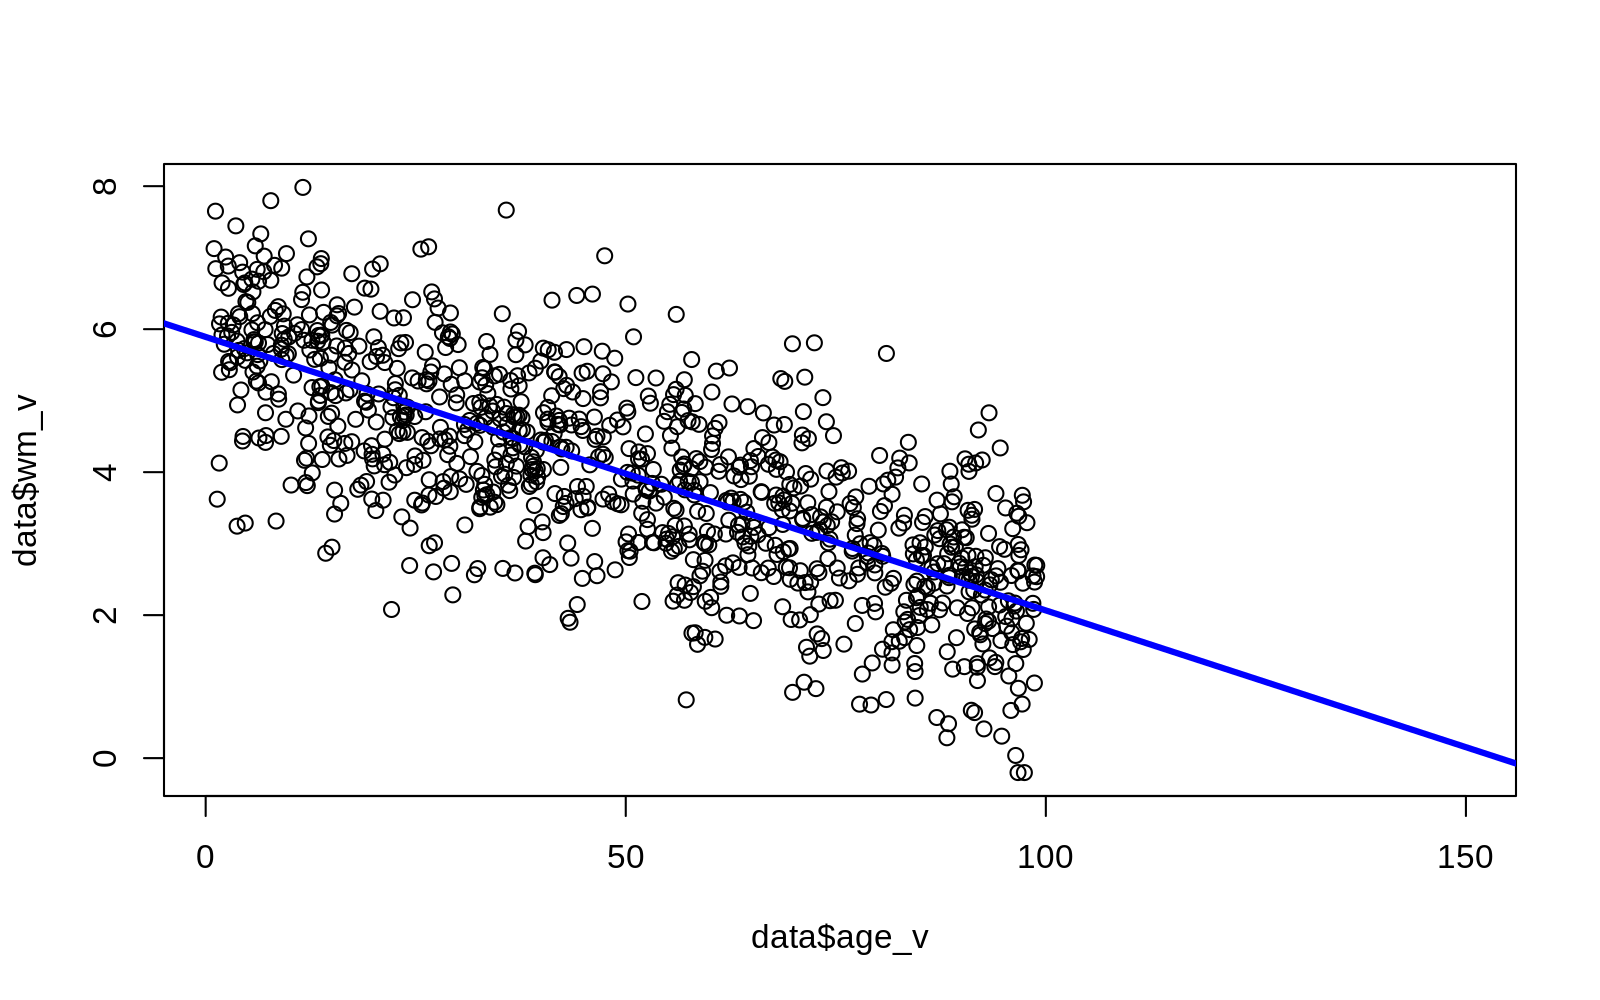

In [62]:
#plot(data$age_v, data$wm_v)
#abline(model$coeff[1], model$coeff[2], lwd=3, col="blue")
#We can even extend the prediction :
plot(data$age_v, data$wm_v,xlim = c(1,150))
abline(model$coeff[1], model$coeff[2], lwd=3, col="blue")

Next step we want to check the models assumption : 

We could do this by hand

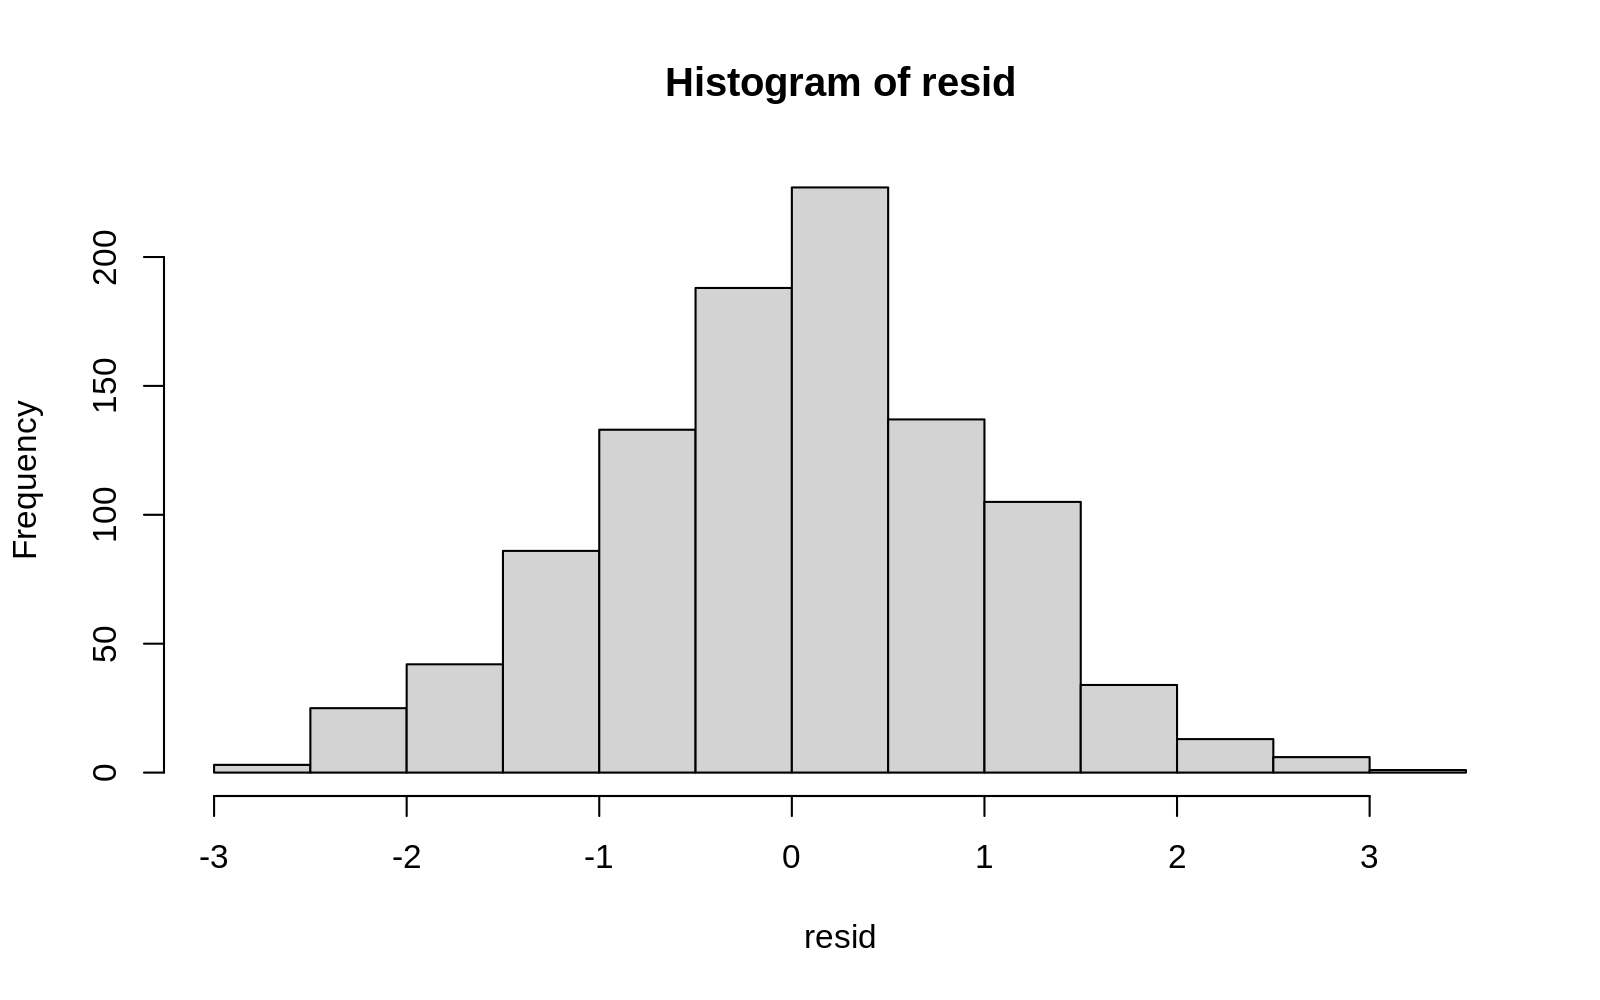

In [63]:
resid = data$wm_v - (model$coeff[1] + model$coeff[2] * data$age_v)
hist(resid)

But in R you have a package for a lot of things :

Loading required namespace: qqplotr

For confidence bands, please install `qqplotr`.



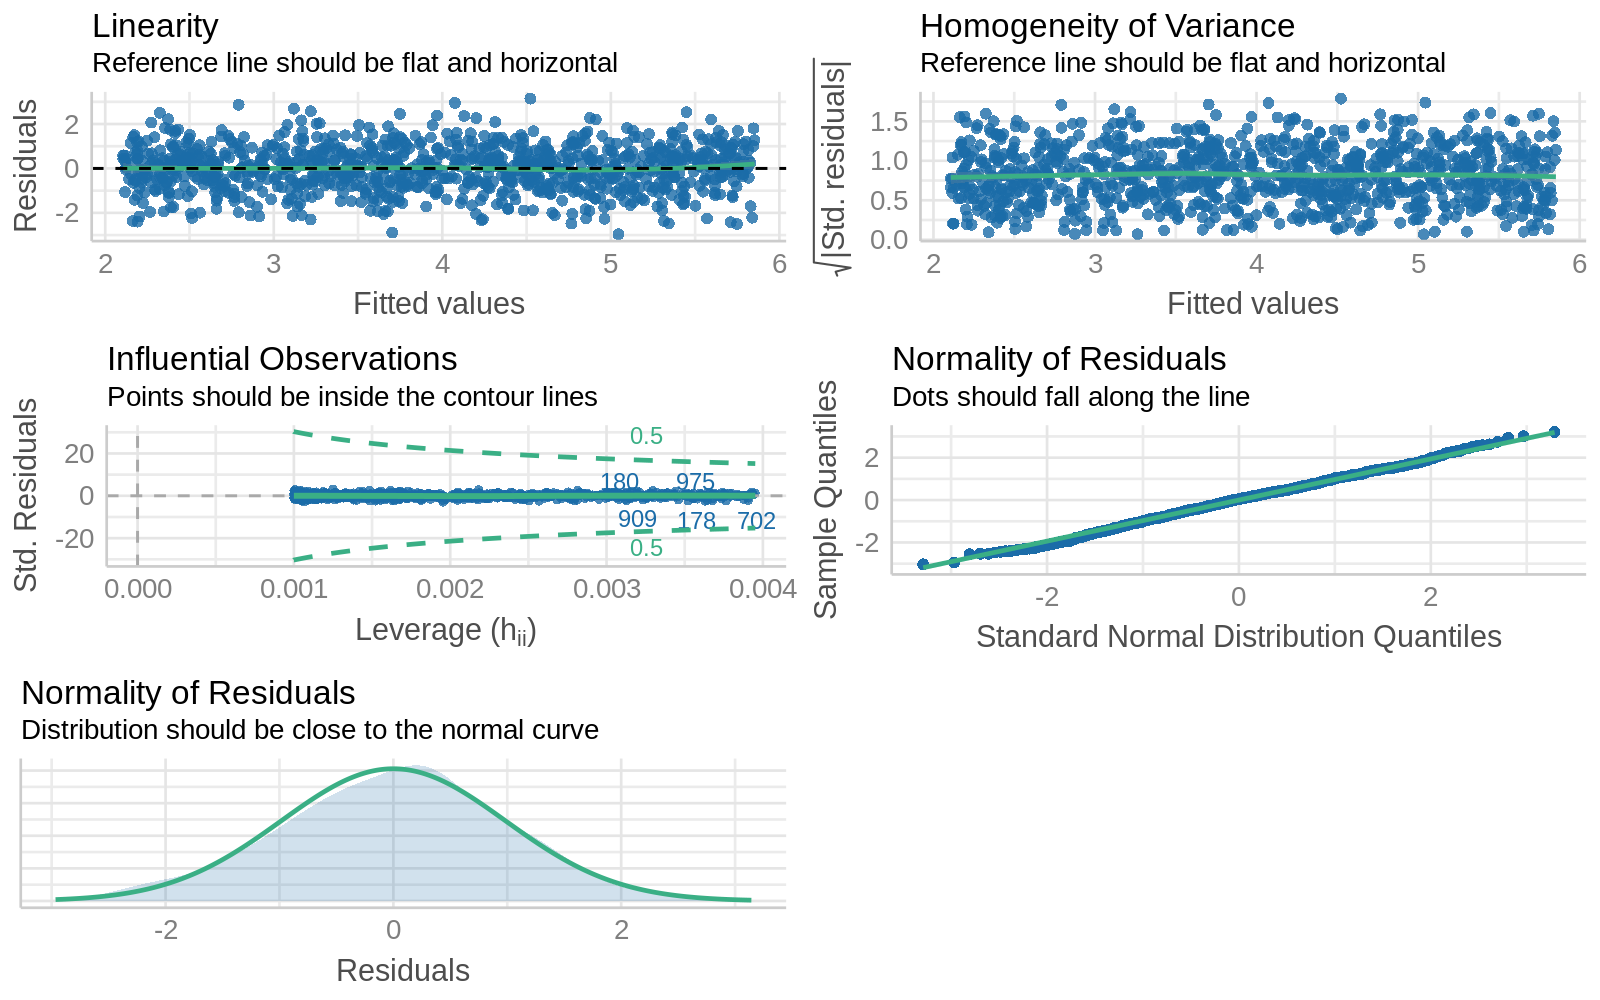

In [64]:
require("performance")#Useful automated assumption check package 
check_model(model)

### Now what if we feed the wrong distribution ?

In [65]:
data_exp = data
data_exp$wm_v = exp(data_exp$wm_v)
exp_model <- lm(wm_v ~ age_v, data=data_exp)

In [66]:
summary(exp_model)


Call:
lm(formula = wm_v ~ age_v, data = data_exp)

Residuals:
    Min      1Q  Median      3Q     Max 
-329.31 -105.46  -25.38   51.80 2610.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 371.9083    14.3770   25.87   <2e-16 ***
age_v        -4.5319     0.2497  -18.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 225.3 on 998 degrees of freedom
Multiple R-squared:  0.2481,	Adjusted R-squared:  0.2474 
F-statistic: 329.4 on 1 and 998 DF,  p-value: < 2.2e-16


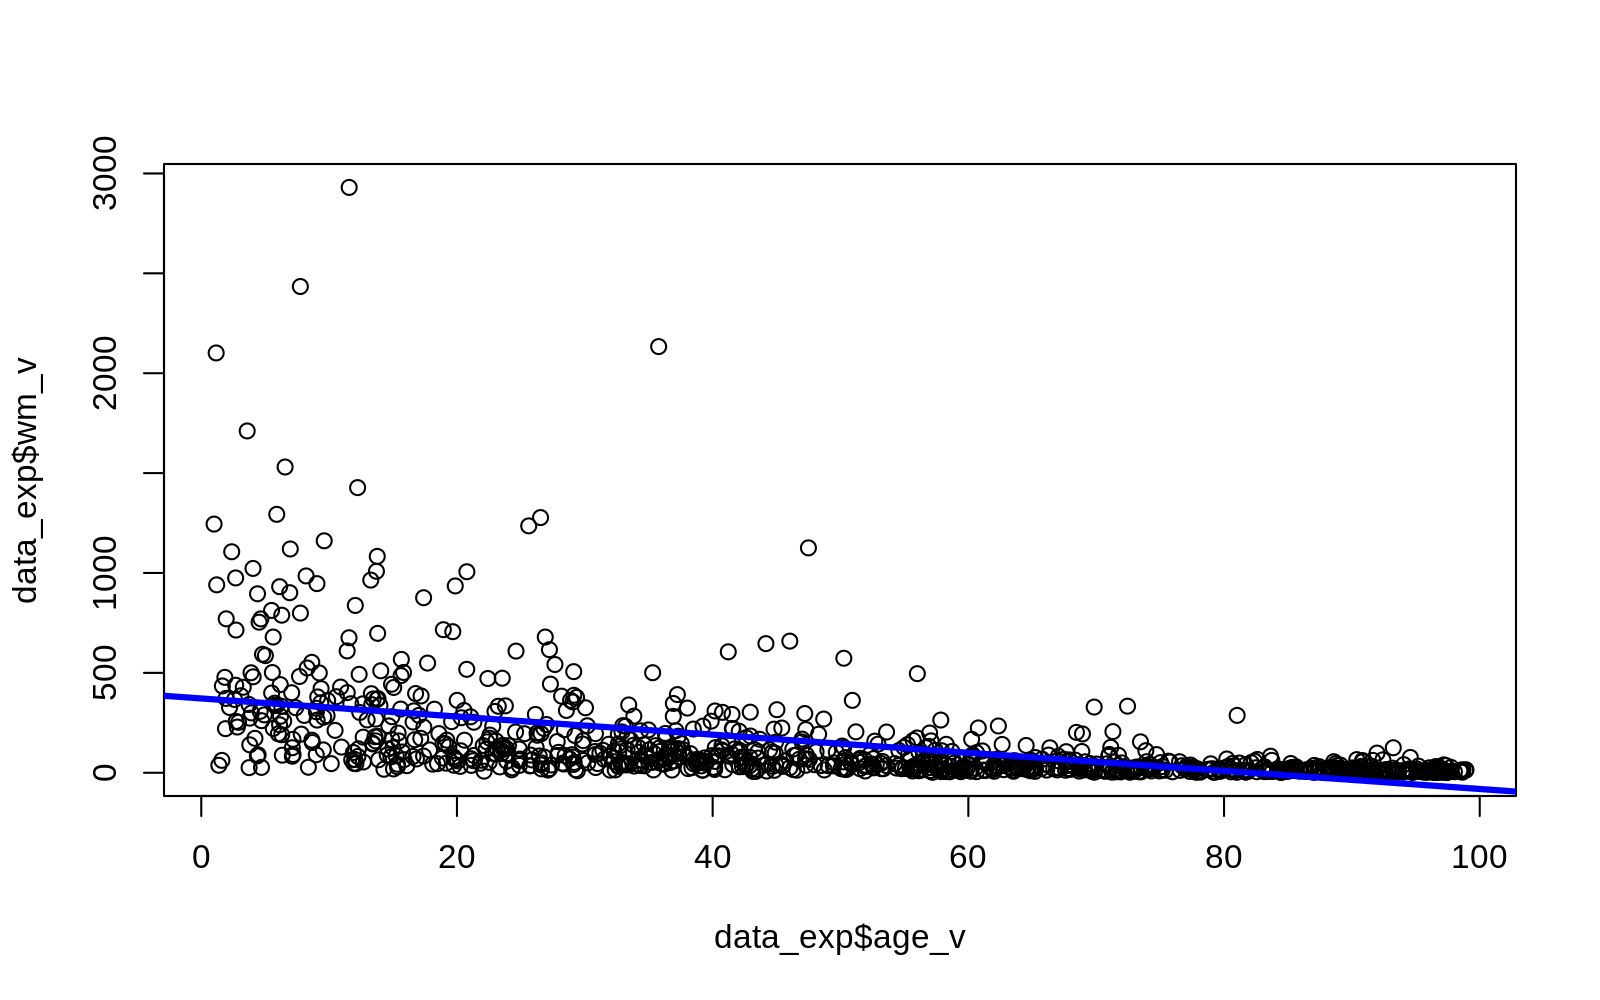

In [67]:
plot(data_exp$age_v, data_exp$wm_v)
abline(exp_model$coeff[1], exp_model$coeff[2], lwd=3, col="blue")

Loading required namespace: qqplotr

For confidence bands, please install `qqplotr`.



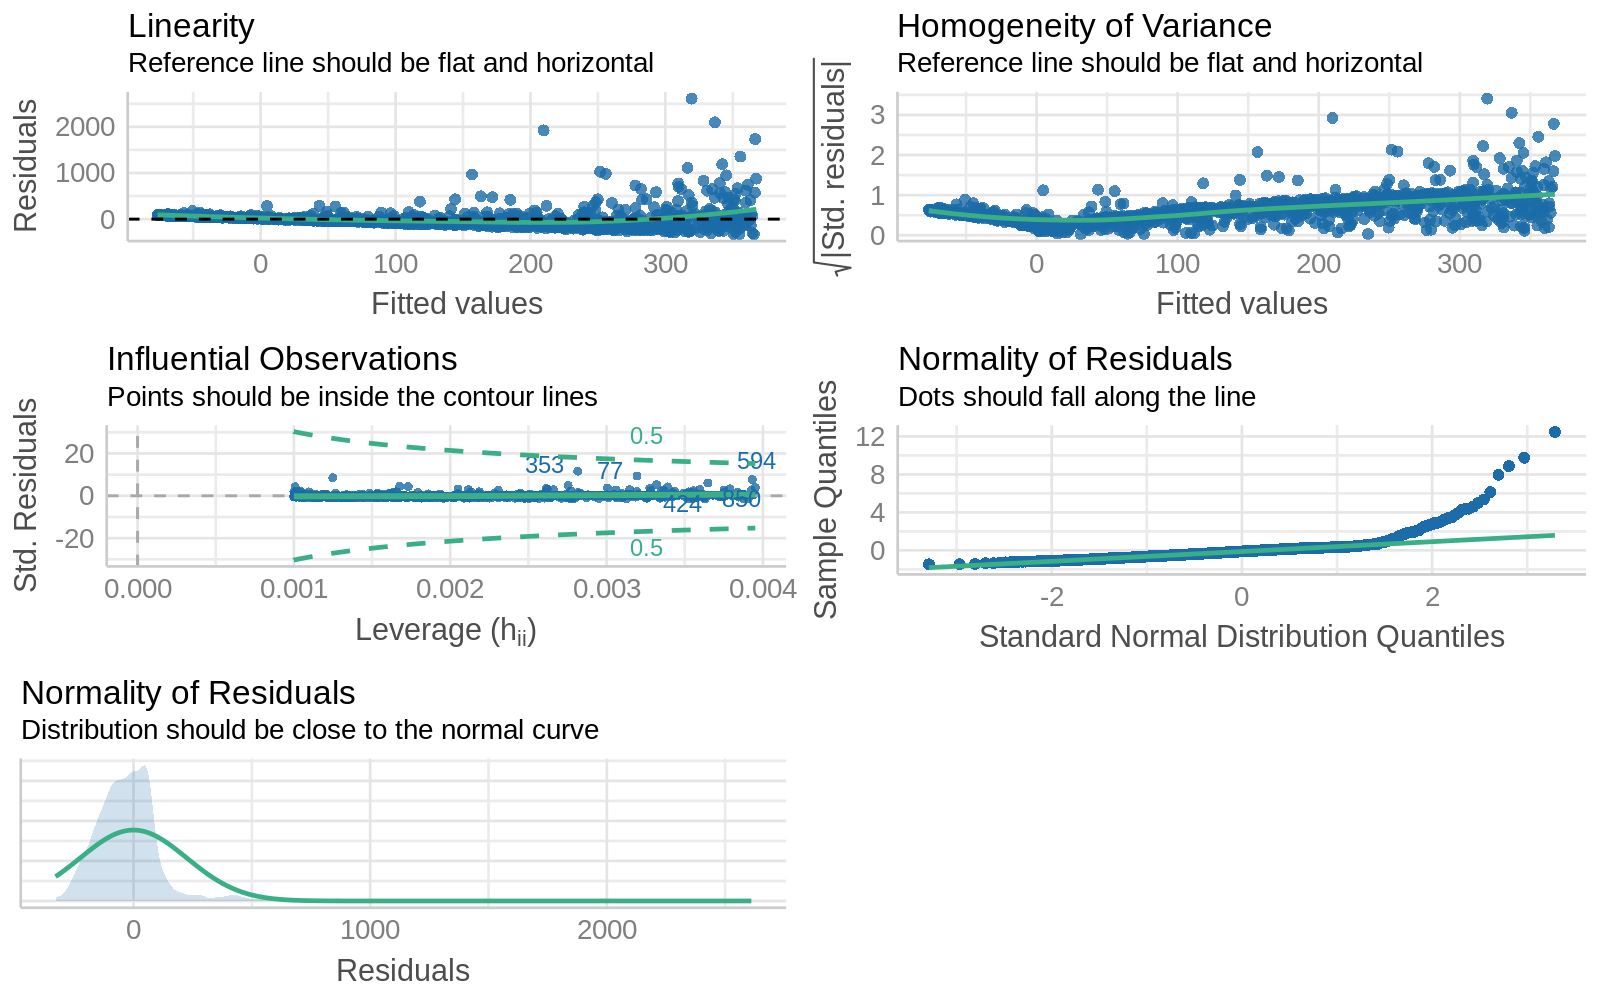

In [68]:
check_model(exp_model)

# Moving to linear models with multiple predictors

Let's add another predictor, _e.g._ with or without a simultaneous task to the working memory task 

In [69]:
mean_double_task = 2
wm_v = rnorm(obs, mean_double_task,sd_wm)#Different mean
data2 = data.frame(wm_v, age_v)#age is the same

In [70]:
# Inducing an interaction :
b_age_double_task = -0.02 #aging of one unit (e.g. year) decreases the WM of 0.2 unit when double
data2$wm_v = data2$wm_v + b_age_double_task * data2$age_v

In [71]:
#Merging 
data$condition = "single"
data2$condition = "double"
data_int = rbind(data, data2)

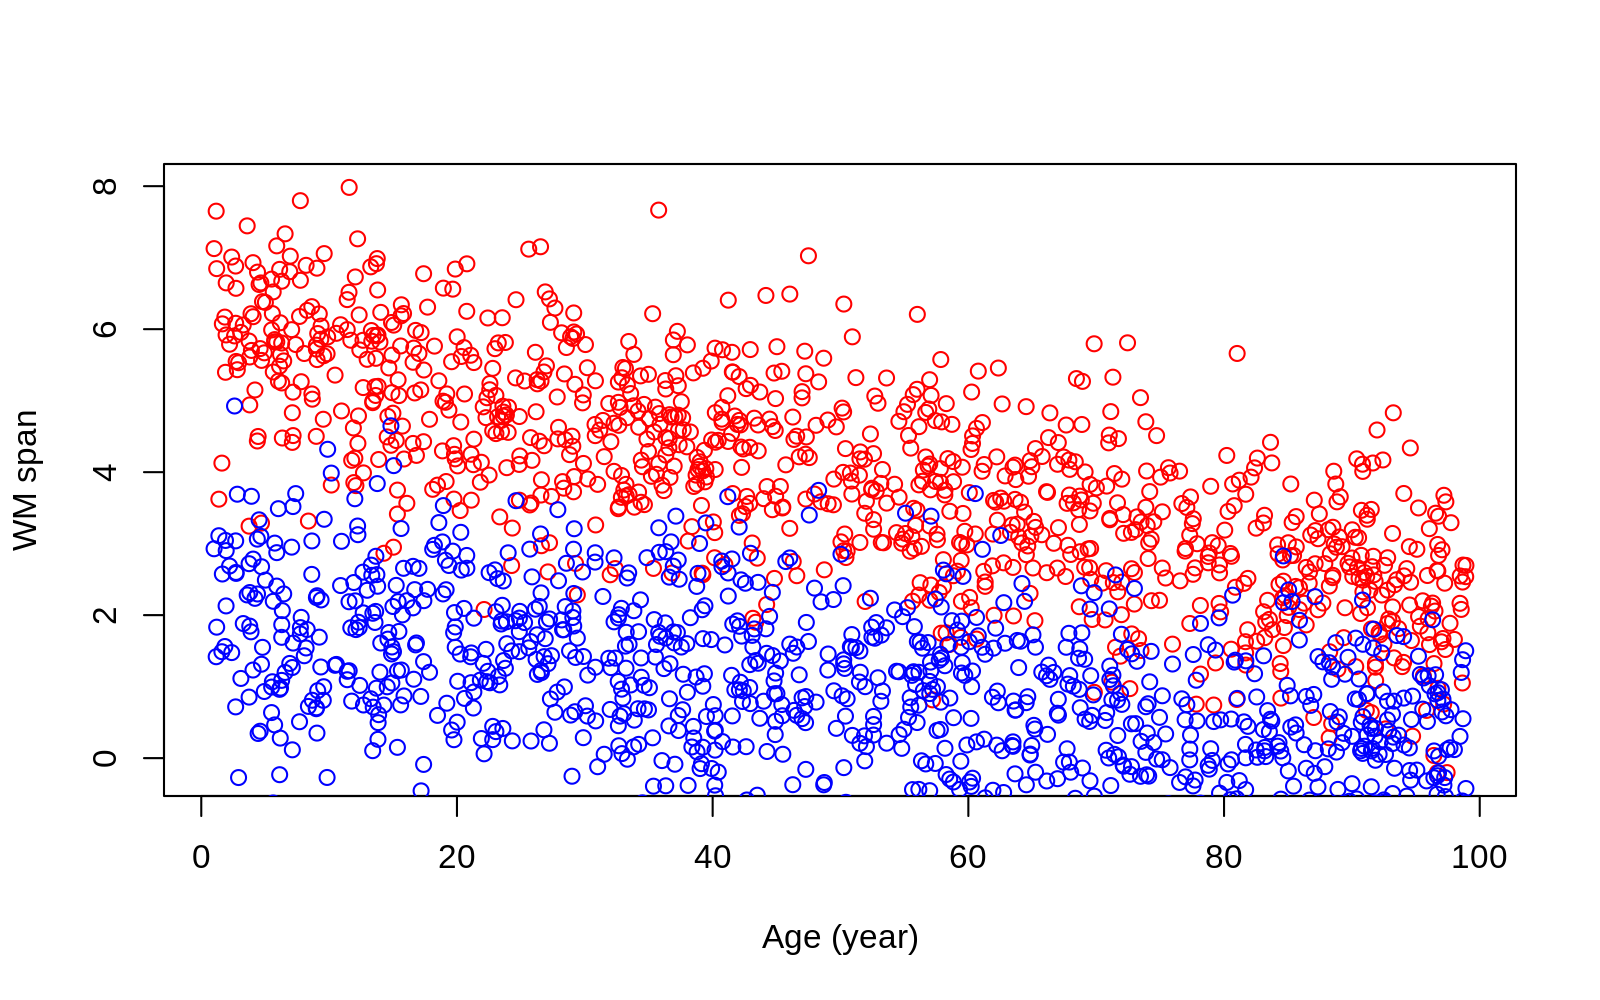

In [72]:
subset = data_int[data_int$condition == "single",]#lisibility/clarity purpose
plot(subset$age_v, subset$wm_v, xlab="Age (year)", ylab="WM span", col="red")

subset = data_int[data_int$condition == "double",]#lisibility/clarity purpose
points(subset$age_v, subset$wm_v, xlab="Age (year)", ylab="WM span", col="blue")

We can fit the model without interaction :

Now the formula is : $\mu = \alpha + \beta_{age} * Age + \beta_{task} * Task$

In [73]:
model_add <- lm(wm_v ~ age_v + condition, data=data_int) 

Let's first plot our model using an automated R library

In [74]:
#install.packages("sjPlot")
library("sjPlot")
library(sjlabelled)
library(sjmisc)
library(ggplot2)

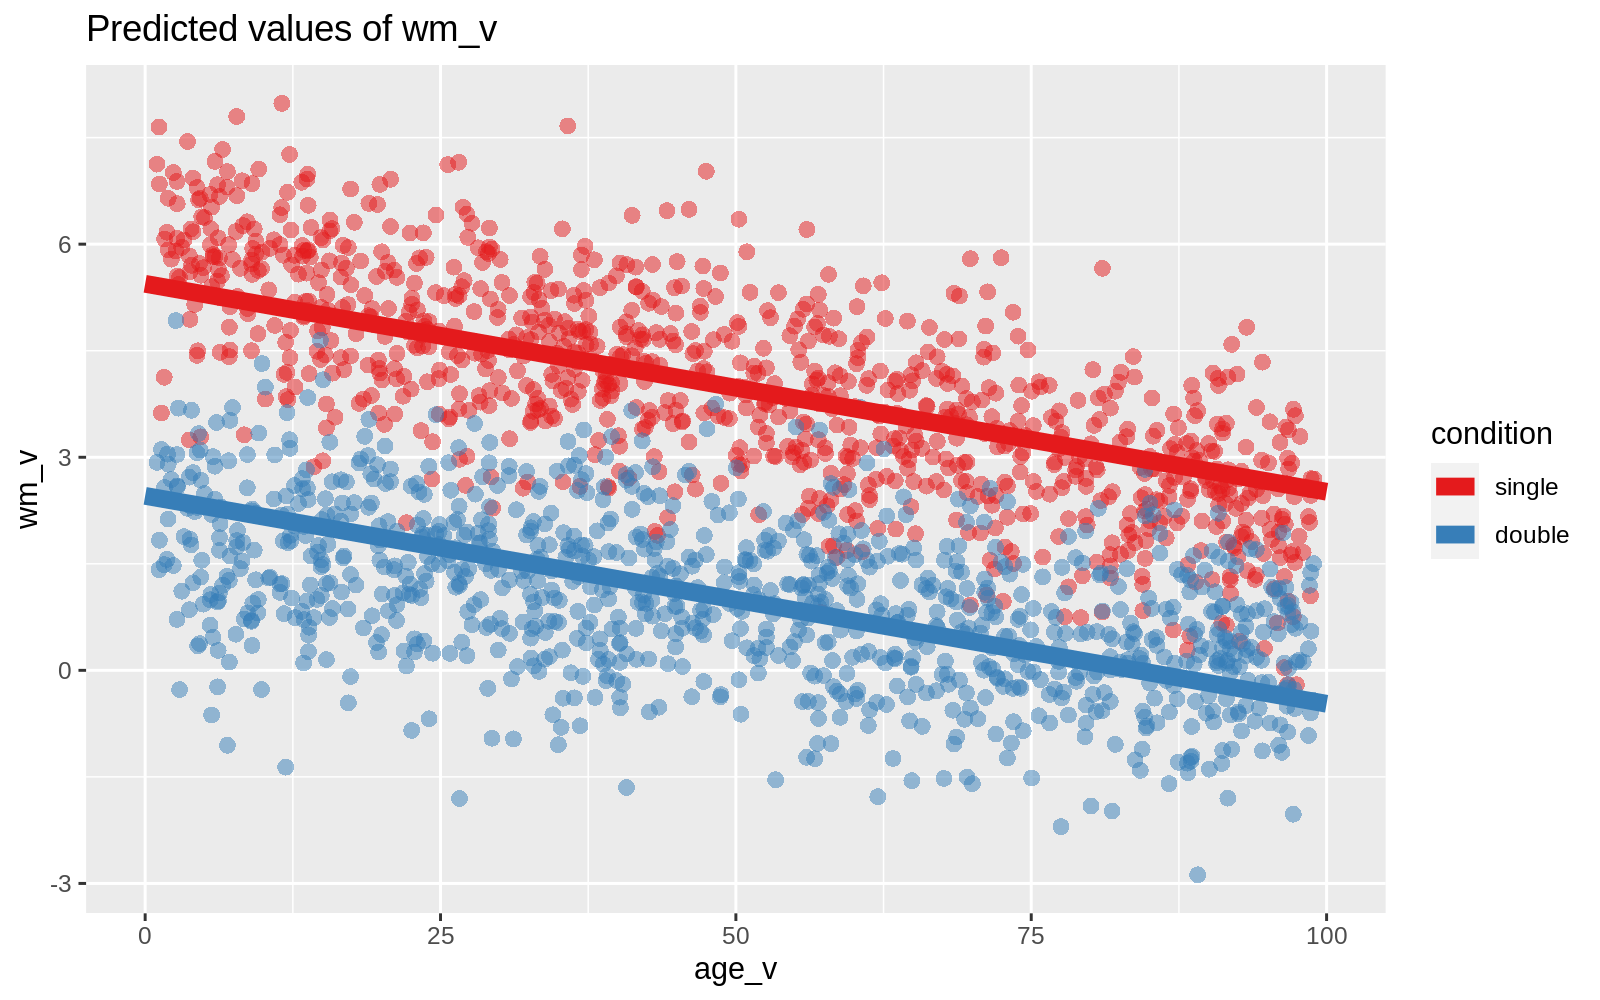

In [75]:
plot_model(model_add, type = "pred", terms = c("age_v", "condition"), 
           show.data = TRUE, ci.lvl = NA, line.size=3)

R's default behavior default coded single as = 1 and double as = 0 (but see later), let's print the output

In [76]:
summary(model_add)


Call:
lm(formula = wm_v ~ age_v + condition, data = data_int)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4833 -0.7029  0.0307  0.7009  3.2708 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.4564125  0.0520062   47.23   <2e-16 ***
age_v           -0.0292721  0.0008094  -36.17   <2e-16 ***
conditionsingle  2.9854702  0.0461787   64.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.033 on 1997 degrees of freedom
Multiple R-squared:  0.7332,	Adjusted R-squared:  0.7329 
F-statistic:  2744 on 2 and 1997 DF,  p-value: < 2.2e-16


We can fit the model with interaction

Now the formula is : $\mu = \alpha + \beta_{age} * Age + \beta_{task} * Task + \beta_{age \times Task} * Age * Task$

In [77]:
model_int <- lm(wm_v ~ age_v * condition, data=data_int)#We switched to "*"
#Or more explicitely :
model_int <- lm(wm_v ~ age_v + condition + age_v:condition, data=data_int)#same as above

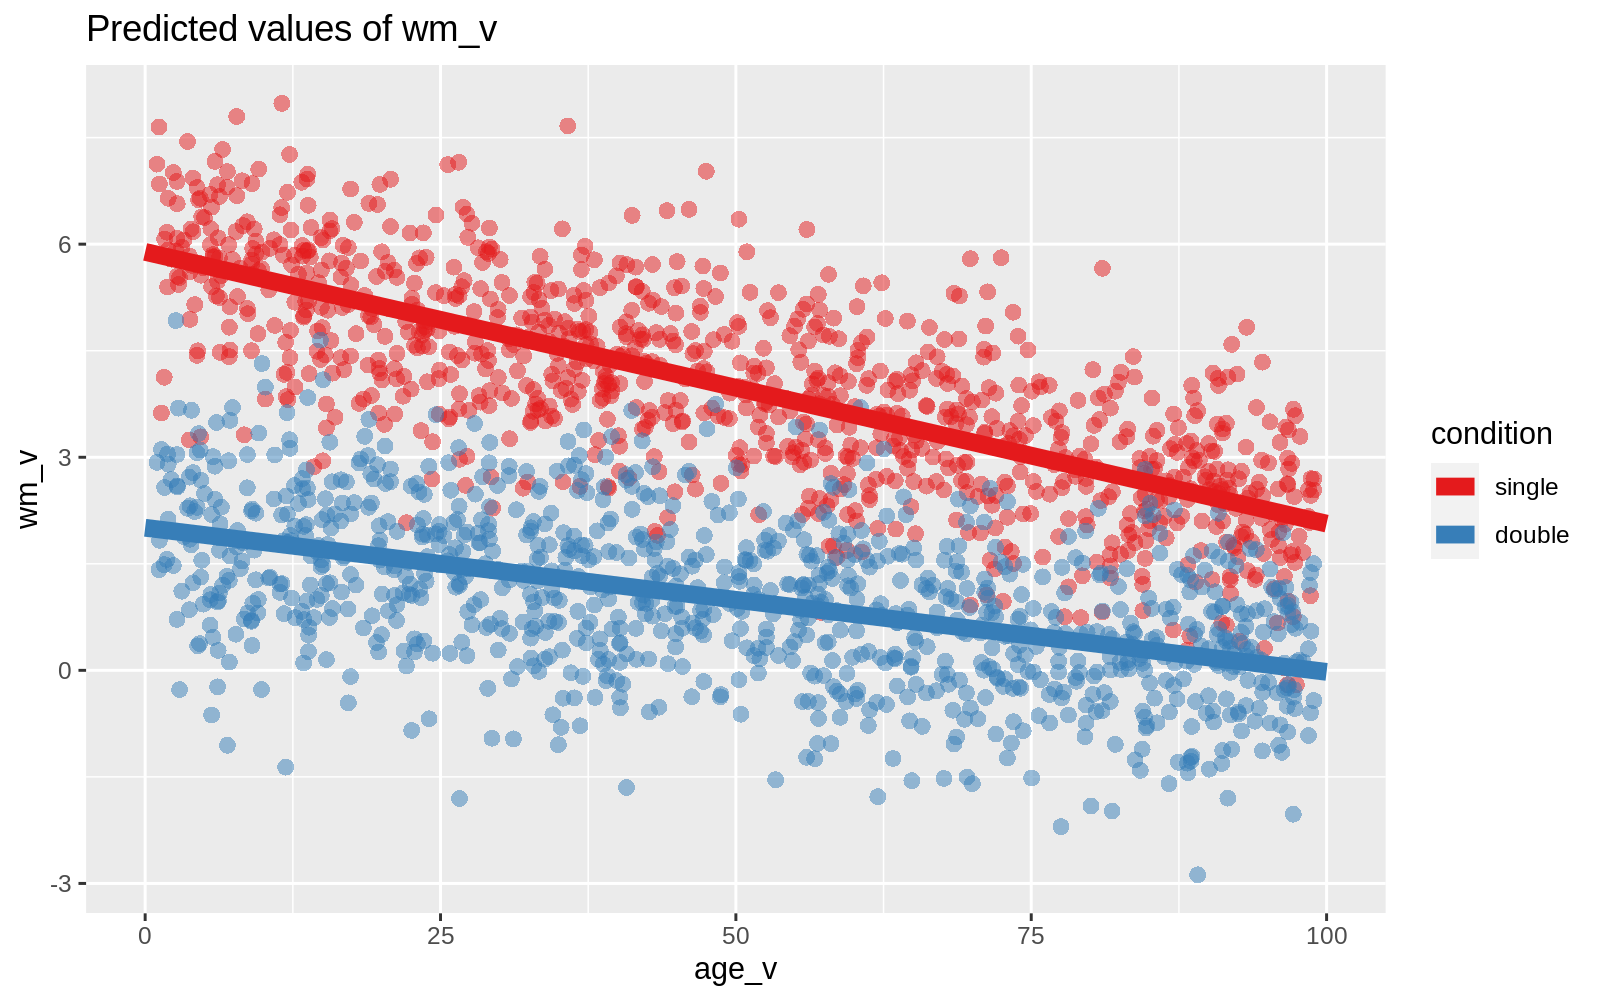

In [78]:
plot_model(model_int, type = "pred", terms = c("age_v", "condition"), 
           show.data = TRUE, ci.lvl = NA, line.size=3)

Now analyze the summary table

In [79]:
summary(model_int)


Call:
lm(formula = wm_v ~ age_v + condition + age_v:condition, data = data_int)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2730 -0.6653  0.0310  0.6679  3.1429 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.007112   0.063852   31.43   <2e-16 ***
age_v                 -0.020288   0.001109  -18.29   <2e-16 ***
conditionsingle        3.884071   0.090301   43.01   <2e-16 ***
age_v:conditionsingle -0.017968   0.001568  -11.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1 on 1996 degrees of freedom
Multiple R-squared:  0.7496,	Adjusted R-squared:  0.7493 
F-statistic:  1992 on 3 and 1996 DF,  p-value: < 2.2e-16


But the default R contrast is not coherent with our research question

# Building on contrast coding of factors

Until now : 
- $\alpha$ = predicted WM when age 0
- $\beta_{age}$ Effect of age on WM when in double condition
- $\beta_{condition}$ difference in intercept when going from double to single task
- $\beta_{age \times condition}$ change in effect of age on WM when single task

We rather would like :
- $\alpha$ = predicted WM when age 1 
- $\beta_{age}$ Effect of age on WM when in single condition (reference) and difference between lowest and highest age
- $\beta_{condition}$ difference in intercept when going from single to double task
- $\beta_{age \times condition}$ change in effect of age/double task on WM when double task/age



We then recode the data

In [80]:
data_int$age_v_recoded = (data_int$age_v - 1)/100
data_int$condition_recoded = ifelse(data_int$condition == "single", 0, 1)

In [81]:
head(data_int)

,wm_v,age_v,condition,age_v_recoded,condition_recoded
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,6.3150246,8.643629,single,0.076436287,0
2,2.6518688,32.378705,single,0.313787047,0
3,0.6671325,95.841536,single,0.948415365,0
4,6.7755663,17.391671,single,0.163916705,0
5,5.9695408,37.239943,single,0.362399432,0
6,6.0742064,1.648316,single,0.006483155,0


In [82]:
tail(data_int)

,wm_v,age_v,condition,age_v_recoded,condition_recoded
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1995,0.6745658,34.98079,double,0.3398079,1
1996,3.6278110,12.01254,double,0.1101254,1
1997,0.9268044,92.42589,double,0.9142589,1
1998,0.7432773,12.68647,double,0.1168647,1
1999,-0.6180795,50.42658,double,0.4942658,1
2000,0.3038832,98.45748,double,0.9745748,1


In [83]:
model_int_recoded <- lm(wm_v ~ age_v_recoded * condition_recoded, data=data_int)
summary(model_int_recoded)


Call:
lm(formula = wm_v ~ age_v_recoded * condition_recoded, data = data_int)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2730 -0.6653  0.0310  0.6679  3.1429 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.85293    0.06289   93.06   <2e-16 ***
age_v_recoded                   -3.82563    0.11090  -34.49   <2e-16 ***
condition_recoded               -3.86610    0.08894  -43.47   <2e-16 ***
age_v_recoded:condition_recoded  1.79683    0.15684   11.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1 on 1996 degrees of freedom
Multiple R-squared:  0.7496,	Adjusted R-squared:  0.7493 
F-statistic:  1992 on 3 and 1996 DF,  p-value: < 2.2e-16


Now we have meaningful parameters, _e.g._ : 

WM scores decreased with age ($\beta_{age} = -0.04, SE = 0.001, p < .05$) as does the presence of a double task ($\beta_{task} = -1.71, SE = 0.07, p < .05$). An interaction was present between age and task ($\beta_{age \times task} = 0.02, SE = 0.002, p < .05)$.

# Think about your contrast

For binary predictors we can choose between :
- "sum" contrast (-1, 1)
- "treatment" contrast (0,1)

The linear model is the same but the interpretation of the intercept changes :

_parameter_ |Sum | Treatment
---|---|---
_Intercept_ | mean between both conditions | mean when standard condition
_Slope_ | Difference between conditions | Difference between conditions


In [196]:
data_int$condition_treatment = ifelse(data_int$condition =="single",0,1)
data_int$condition_sum = ifelse(data_int$condition =="single",-1,1 )
summary(lm(wm_v ~ age_v * condition_treatment, data=data_int))$coefficients
summary(lm(wm_v ~ age_v * condition_sum, data=data_int))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.89118292,0.063852450,92.26244,0.000000e+00
age_v,-0.03825628,0.001109038,-34.49500,6.297549e-205
condition_treatment,-3.88407058,0.090301001,-43.01249,1.327709e-286
age_v:condition_treatment,0.01796830,0.001568417,11.45633,1.783488e-29


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.94914763,0.0451505007,87.46631,0.000000e+00
age_v,-0.02927213,0.0007842086,-37.32697,9.007915e-232
condition_sum,-1.94203529,0.0451505007,-43.01249,1.327709e-286
age_v:condition_sum,0.00898415,0.0007842086,11.45633,1.783488e-29


Now imagine we have three modalities : 
- single task 
- double task same modality (verbal - verbal) 
- double task different modalities (verbal - non-verbal)

In [192]:
mean_double_task_same = 5
mean_double_task_diff = 2

wm_v = rnorm(obs, mean_double_task_same,sd_wm)#Different mean
data_same = data.frame(wm_v, age_v)

wm_v = rnorm(obs, mean_double_task_diff,sd_wm)#Different mean
data_diff = data.frame(wm_v, age_v)

#Merging 
data$condition = "a-single"
data_same$condition = "d-same"
data_diff$condition = "d-diff"
data_threemod = rbind(data, data_same, data_diff)
data_threemod$condition = as.factor(data_threemod$condition)#We are working with the factor class
print(levels(data_threemod$condition))

[1] "a-single" "d-diff"   "d-same"  


Sum contrasting your n modalities

In [195]:
data_threemod$condition_sum = data_threemod$condition
contrasts(data_threemod$condition_sum) = contr.sum(3)#Defining the contrast matrix
print(contrasts(data_threemod$condition_sum)) #printing it
sum_cont = lm(wm_v ~ age_v * condition_sum, data=data_threemod)
summary(sum_cont)$coefficients

         [,1] [,2]
a-single    1    0
d-diff      0    1
d-same     -1   -1


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.31972552,0.0368106263,117.34996,0.000000e+00
age_v,-0.01283485,0.0006393552,-20.07468,3.356279e-84
condition_sum1,1.57145741,0.0520580870,30.18661,5.407327e-175
condition_sum2,0.72329773,0.0520580870,13.89405,1.403789e-42
age_v:condition_sum1,-0.02542142,0.0009041848,-28.11529,1.508955e-154
age_v:condition_sum2,0.01225058,0.0009041848,13.54875,1.239886e-40


Treatment contrasting your n modalities

In [177]:
data_threemod$condition_treatment = data_threemod$condition
contrasts(data_threemod$condition_treatment) = contr.treatment(3)
print(contrasts(data_threemod$condition_treatment))
treatment_cont = lm(wm_v ~ age_v * condition_treatment, data=data_threemod)
summary(treatment_cont)$coefficients

         2 3
a-single 0 0
d-diff   1 0
d-same   0 1


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.89118292,0.063363297,92.97469,0.000000e+00
age_v,-0.03825628,0.001100542,-34.76129,1.036410e-222
condition_treatment2,-0.96246299,0.089609234,-10.74067,1.974392e-26
condition_treatment3,-3.92146477,0.089609234,-43.76184,9.881313e-324
age_v:condition_treatment2,0.04044263,0.001556402,25.98469,2.067890e-134
age_v:condition_treatment3,0.03937246,0.001556402,25.29710,4.009068e-128


But we can define custom contrasts

In [187]:
data_threemod$condition_sum = data_threemod$condition
contrasts(data_threemod$condition_sum,how.many=2) = matrix(c(-1,0,1,-1,1,0),ncol=2)
print(contrasts(data_threemod$condition_sum))
sum_cont = lm(wm_v ~ age_v * condition_sum, data=data_threemod)
summary(sum_cont)$coefficients

         [,1] [,2]
a-single   -1   -1
d-diff      0    1
d-same      1    0


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.26320701,0.0365828164,116.53578,0.000000e+00
age_v,-0.01165125,0.0006353985,-18.33692,2.903960e-71
condition_sum1,-2.29348885,0.0517359152,-44.33069,0.000000e+00
condition_sum2,0.66551293,0.0517359152,12.86365,6.719274e-37
age_v:condition_sum1,0.01276743,0.0008985891,14.20831,2.183827e-44
age_v:condition_sum2,0.01383760,0.0008985891,15.39925,1.489765e-51


We could build more complex contrast coding schemes (see the paper by Schad, Vasishth, Hohenstein, Kliegl [2020](https://www.sciencedirect.com/science/article/pii/S0749596X19300695) )

# Collinearity

Multiple predictors yields the question of collinearity, _i.e._ when another factor does not add a lot of information compared to using only the first factor.

Example let's simulate data where we predict reaction time (RTs) using IQ and memory scores

In [36]:
library('MASS')
varcovmat = matrix(c(1, .97, .97, 1), nrow=2)
data = mvrnorm(n=100, mu=c(0, 0), Sigma=varcovmat, empirical=TRUE)
iq = data[, 1]*15 +100#Just rescaling for "natural" scale
mem = data[, 2]*15 +100 #same

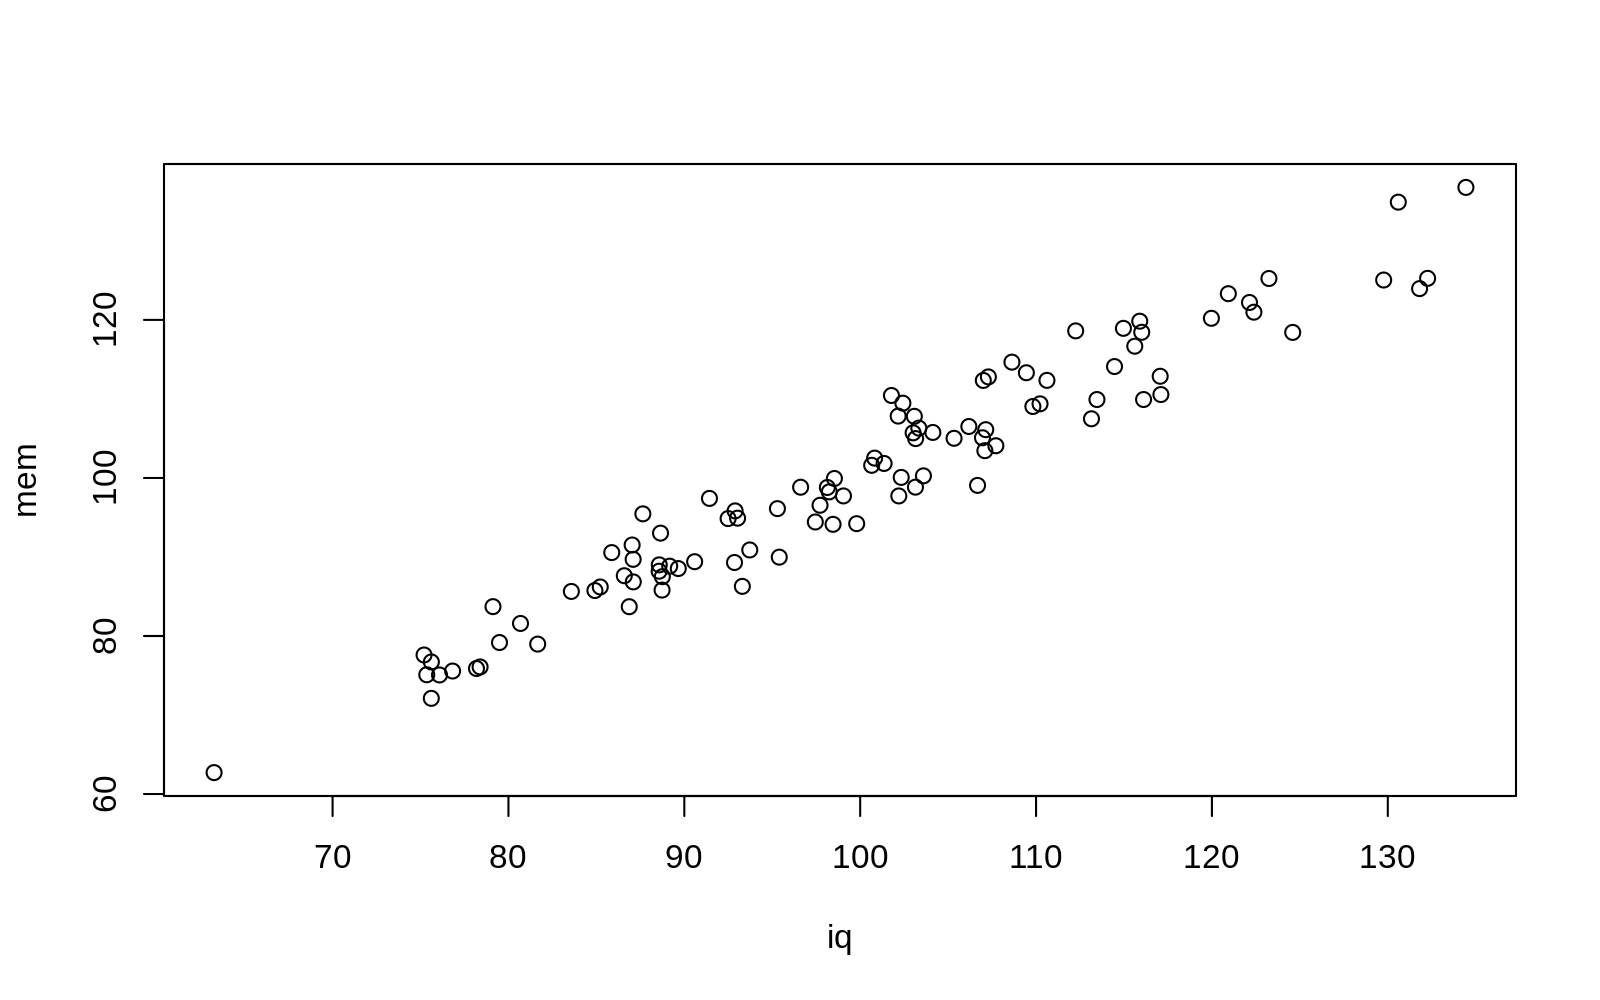

In [37]:
plot(iq,mem)

In [38]:
rt = rnorm(100, 500,50) + -1*iq #Only relationship simulated is with IQ

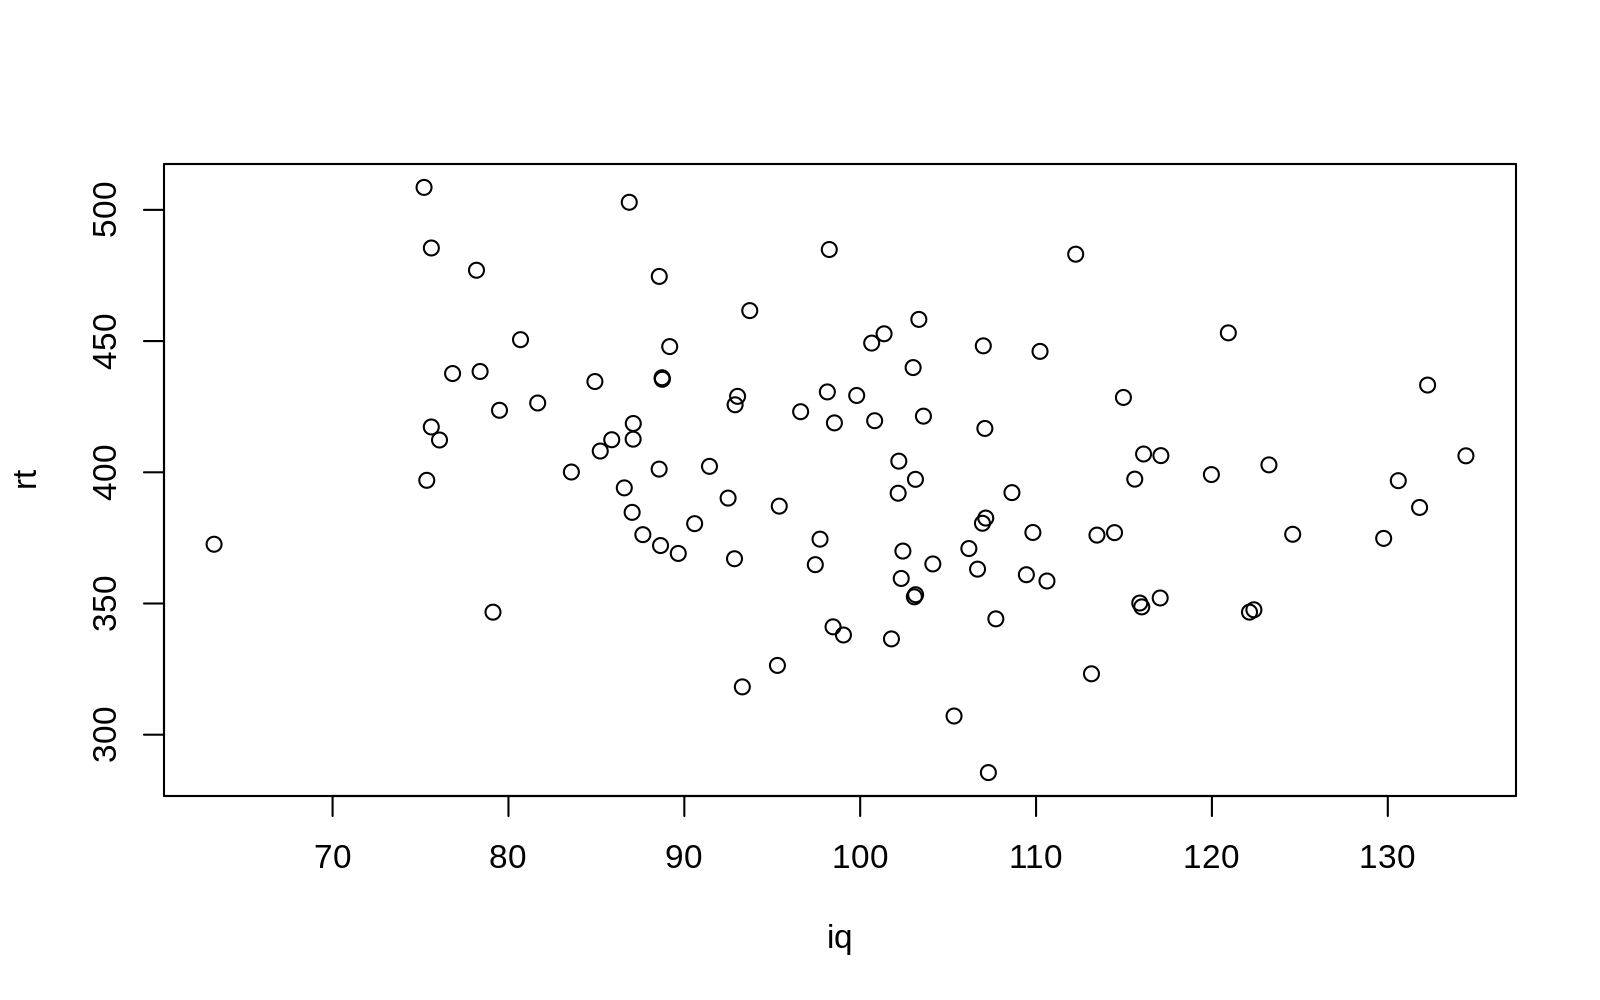

In [39]:
plot(iq, rt)

In [40]:
model_rt = lm(rt ~ iq + mem)#Additive, we did not include an interaction

In [41]:
summary(model_rt)


Call:
lm(formula = rt ~ iq + mem)

Residuals:
     Min       1Q   Median       3Q      Max 
-107.392  -31.466   -1.463   24.007   94.377 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 483.2304    29.1289  16.589   <2e-16 ***
iq           -0.7652     1.1764  -0.651    0.517    
mem          -0.0725     1.1764  -0.062    0.951    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.68 on 97 degrees of freedom
Multiple R-squared:  0.08092,	Adjusted R-squared:  0.06197 
F-statistic:  4.27 on 2 and 97 DF,  p-value: 0.0167


In [42]:
check_collinearity(model_rt)

,Term,VIF,SE_factor
,<chr>,<dbl>,<dbl>
1,iq,16.92047,4.11345
2,mem,16.92047,4.11345


In [43]:
model_rt = lm(rt ~ iq)

In [44]:
summary(model_rt)


Call:
lm(formula = rt ~ iq)

Residuals:
     Min       1Q   Median       3Q      Max 
-107.806  -31.207   -1.267   23.974   93.890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 483.0129    28.7670  16.791  < 2e-16 ***
iq           -0.8356     0.2845  -2.937  0.00413 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.46 on 98 degrees of freedom
Multiple R-squared:  0.08089,	Adjusted R-squared:  0.07151 
F-statistic: 8.624 on 1 and 98 DF,  p-value: 0.004134


But collinearity is not a pathology of the model (_e.g._ IQ and memory indices are generally correlated)

# Statistical inference on LM

- Use stepwise regressions : [how to do it in R](https://www.neurotroph.de/2020/02/how-to-do-stepwise-regression-in-r/) 

# Statistical inference on LM

- ~~Use stepwise regression~~
- Use estimates and associated p-values (but see last module on Bayesian estimation of LMMs) []()

# Limitations of the classical LM

Problems is that in psychology/neuroscience :
- Within design  (e.g. same participant performing single and double task) -> Non _iid_ data
- Repeated measurment (e.g. we sample several scores for precision)-> Non _iid_ data
- Non-normal data (e.g. Reaction times)


The last two points could be alleviated by taking a central tendency index (e.g. mean) but we would loose information.


# Using Linear Mixed Models

- Directly allows to account for within design -> preserve the higher precision of within design and accounting for the non _i.i.d_ nature induced by within design
- Account for repeated measurment -> no pre-averaging
- Imbalance in repeated measure (_e.g._ one participant with fewer trials) is compensated by LMM
- Provides estimates in terms of effect size rather than obscure data-abstract statistical values (_t_, F)


But... there is no free lunch

### Moving to module 2